In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA

In [17]:
#Import
dat=pd.read_csv('..\\Project\\train.csv', sep=',') 

#Remove non-essential columns
dat2=dat.loc[:,["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]] #Essential columns

#Impute values from random sampling
Embarked_sample=list(dat2.Embarked[dat2.Embarked.notnull()]) #list excluding nans
Age_sample=list(dat2.Age[dat2.Age.notnull()]) #list excluding nans

random.seed(10)
draw_Embarked=random.sample(population=Embarked_sample,k=2) #random sampling 

random.seed(10)
draw_Age=random.sample(population=Age_sample,k=177) #random sampling 

dat2.loc[~dat2.Age.notnull(),"Age"]=draw_Age #replace nans
dat2.loc[~dat2.Embarked.notnull(),"Embarked"]=draw_Embarked #replace nans

#ENCODING
#Encode Sex
dat2.loc[:,'Sex']=LabelBinarizer().fit_transform(dat2.loc[:,'Sex']) #Females:0, Males:1
dat2.rename(columns={"Sex":"Sex_male"},inplace=True) #Renamed column

#Encode Embark
Embark_coded_columns=LabelBinarizer().fit_transform(dat2.Embarked)
X = pd.DataFrame(Embark_coded_columns, columns = ["Embark:C","Embark:Q","Embark:S"])
dat2 = pd.concat([dat2, X], axis=1)
dat2.drop(["Embarked"],axis=1,inplace=True)
dat2.head(5)

x=StandardScaler().fit_transform(dat2)
x=pd.DataFrame(x,columns=dat2.columns)

In [20]:
x.head()

,Survived,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embark:C,Embark:Q,Embark:S
0,-0.789272,0.827377,0.737695,-0.514200,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.615838
1,1.266990,-1.566107,-1.355574,0.564862,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.623803
2,1.266990,0.827377,-1.355574,-0.244434,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.615838
3,1.266990,-1.566107,-1.355574,0.362538,0.432793,-0.473674,0.420730,-0.482043,-0.307562,0.615838
4,-0.789272,0.827377,0.737695,0.362538,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838


Text(0.5,1,'Variance Explained Ratio')

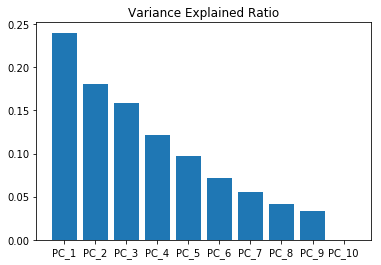

In [93]:
plt.bar(["PC_{}".format(x+1) for x in range(10)],pca.explained_variance_ratio_)
plt.title("Variance Explained Ratio")

In [39]:
PC1=pca.components_[0]
PC2=pca.components_[1]

In [94]:
print("PC1 can be described as: survivors, female, older, low siblings, upperclass")
print("PC2 can be described as: non-survivors, male, younger, high siblings, lower class")
arrows=np.vstack((PC1,PC2)).T
arrow_labels=list(x)
pd.DataFrame(np.vstack((PC1,PC2)).T,index=list(x),columns=["PC1","PC2"])


PC1 can be described as: survivors, female, older, low siblings, upperclass
PC2 can be described as: non-survivors, male, younger, high siblings, lower class


,PC1,PC2
Survived,0.405879,0.154718
Pclass,-0.411040,-0.062237
Sex_male,-0.332907,-0.253689
Age,0.082739,-0.211657
SibSp,0.030340,0.433046
Parch,0.124558,0.477818
Fare,0.436365,0.193952
Embark:C,0.439655,-0.302843
Embark:Q,0.000294,-0.318100
Embark:S,-0.385342,0.465484


In [159]:
PC1

array([ 4.05879414e-01, -4.11040085e-01, -3.32906998e-01,  8.27386837e-02,
        3.03402474e-02,  1.24558492e-01,  4.36365390e-01,  4.39655436e-01,
        2.94450430e-04, -3.85341536e-01])

In [51]:
F1=np.dot(PC1,pca.transform(x).T)
F2=np.dot(PC2,pca.transform(x).T)

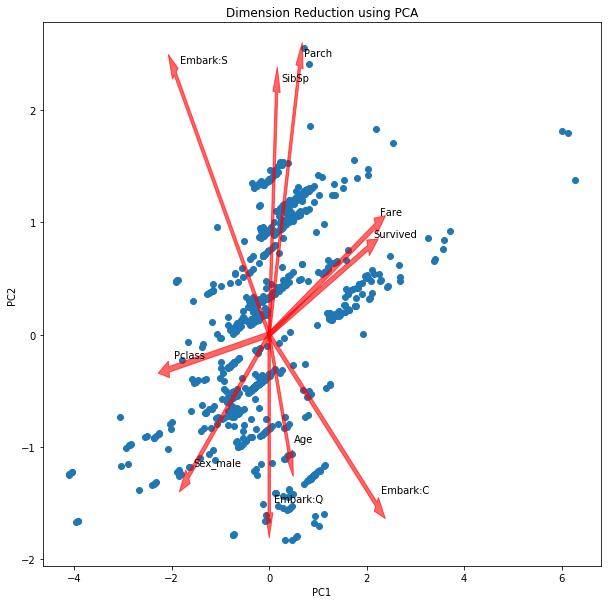

In [181]:
plt.figure(figsize=(10,10))
plt.scatter(F1,F2)
for i in range(10):
    plt.arrow(0,0,arrows[i][0]*5,arrows[i][1]*5,width=.05,alpha=.6,color="red")
    plt.annotate(arrow_labels[i],xy=arrows[i]*5+.1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dimension Reduction using PCA")
plt.show()